In [2]:
# import the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)

In [3]:
# Load the data

df = pd.read_csv('bank.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Exploring data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Shape of Data

df.shape  # -> 21 columns and 41188 rows

(41188, 21)

In [6]:
# checking datatypes

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [9]:
# missing value columns

missing = [miss for miss in df.columns if df[miss].isnull().sum() > 0]
print(missing)  # No missing values present

[]


In [10]:
# displaying categorical and numerical variables

cat_cols = list(df.select_dtypes(include = ['object']))
print(f'categrical columns: {cat_cols}')

num_cols = list(df.select_dtypes(exclude = ['object']))
print(f'numerical columns: {num_cols}')

categrical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


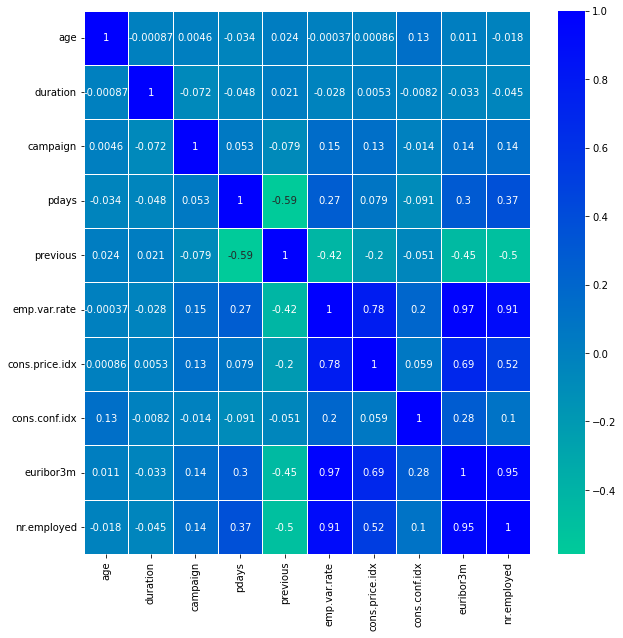

In [11]:
# HeatMap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='winter_r')
plt.show()

In [12]:
# Removing high  cardinality columnns

for i in cat_cols:
    if df[i].nunique() > 5:
        cat_cols.remove(i)
        df.drop(i, axis = 1, inplace = True)

<AxesSubplot:xlabel='count', ylabel='y'>

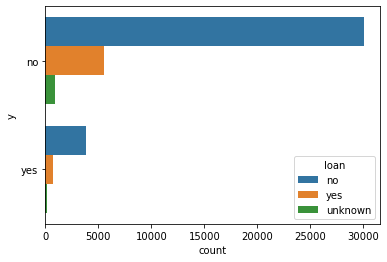

In [13]:
# Primary analysis using Categorical Variable

sns.countplot(y = "y", hue = "loan" , data = df)

<AxesSubplot:xlabel='count', ylabel='y'>

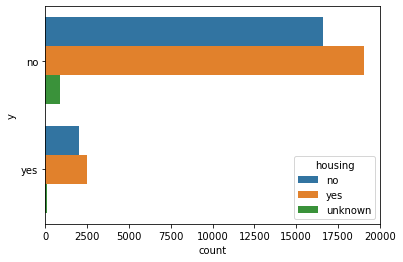

In [14]:
sns.countplot(y = "y", hue = "housing" , data = df)

In [16]:
# Label encoding categorical columns:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for i in cat_cols:
    df[i]= label_encoder.fit_transform(df[i])

In [17]:
# Define X and Y

x = df.drop('y', axis = 1)
y = df['y']

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.30)

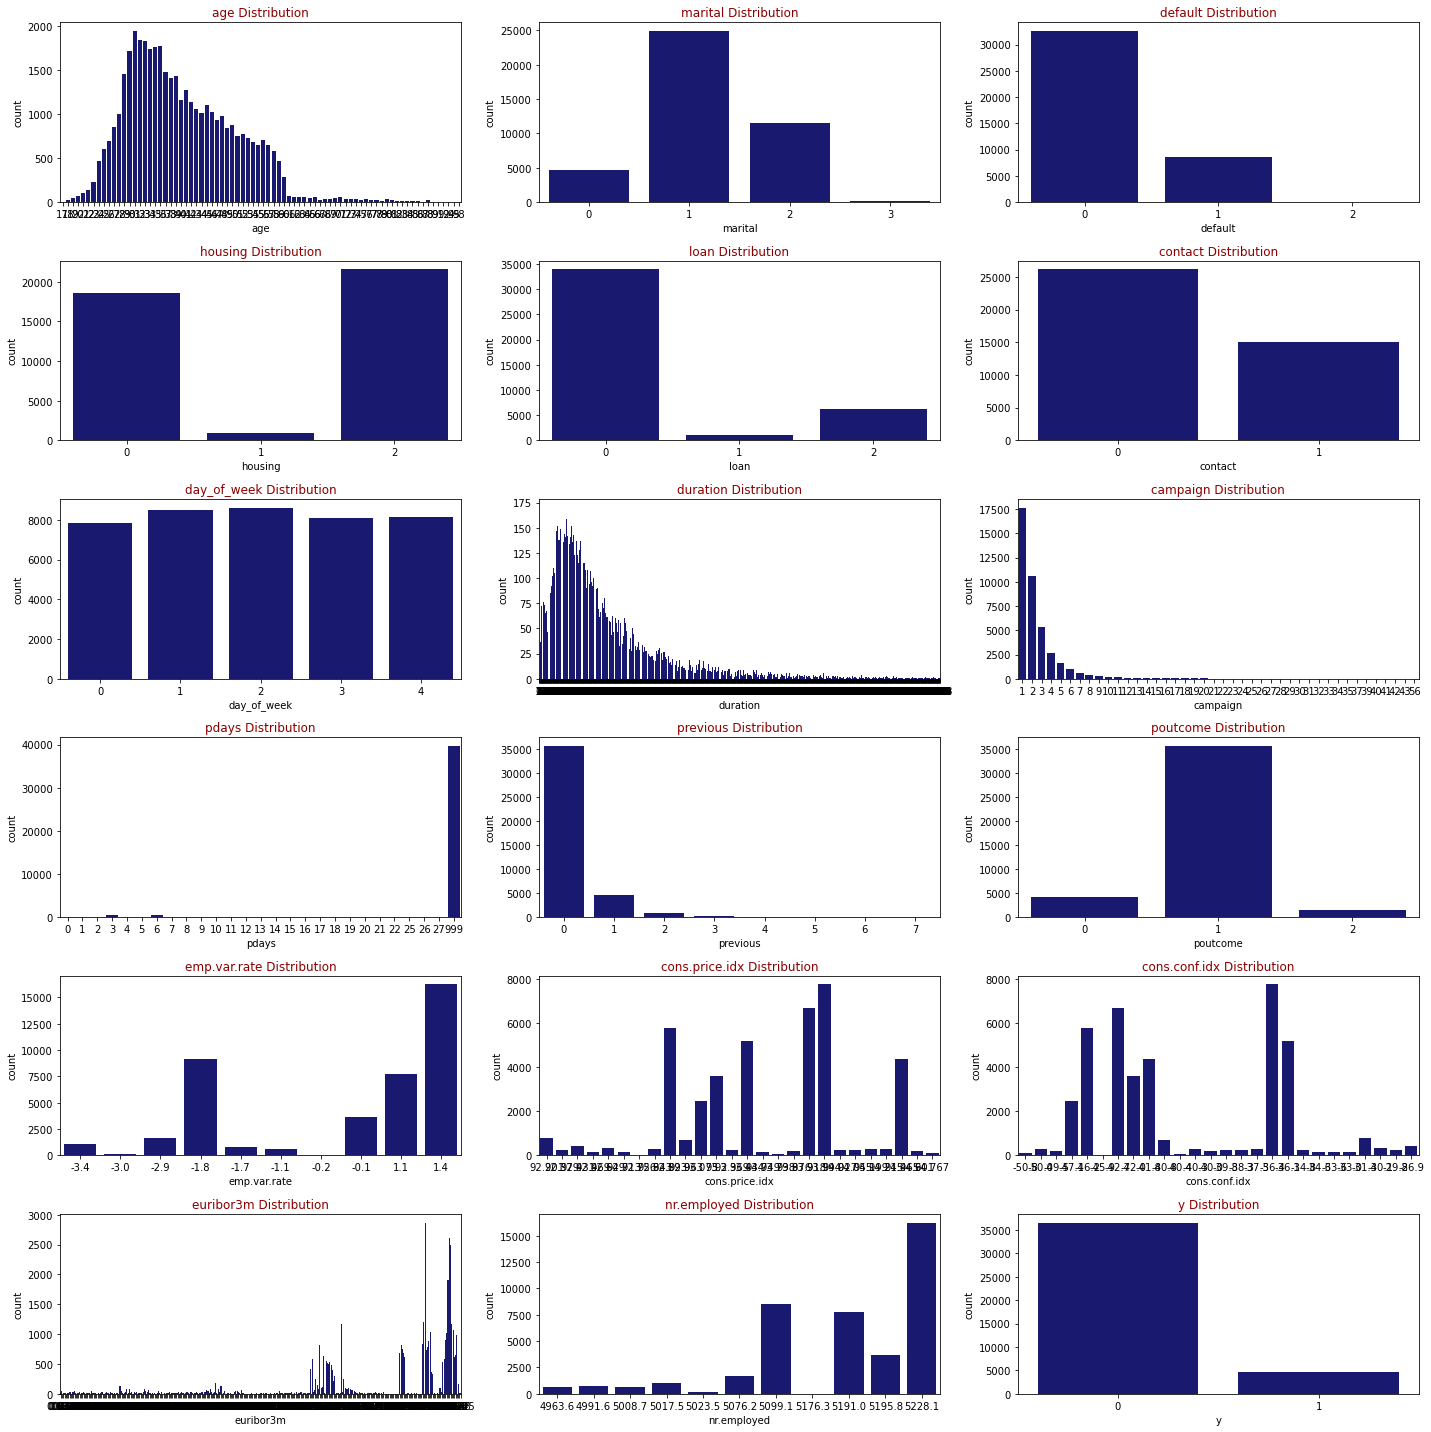

In [18]:
def draw_countplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.countplot(df[feature], ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_countplot(df,df.columns,6,3)

In [19]:
# Selecting features using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

4

In [20]:
selected_feat

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')

<AxesSubplot:title={'center':'Target distribution before appying SMOTE'}, xlabel='Target'>

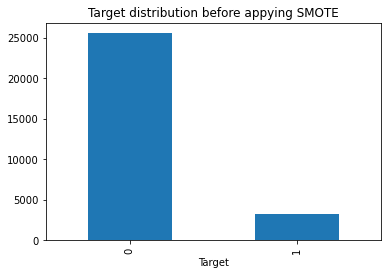

In [21]:
# Viusalizing Target before using Smote

pd.Series(y_train).value_counts().plot(kind='bar', title='Target distribution before appying SMOTE', xlabel='Target')

In [22]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

<AxesSubplot:title={'center':'Target distribution after appying SMOTE'}, xlabel='Target'>

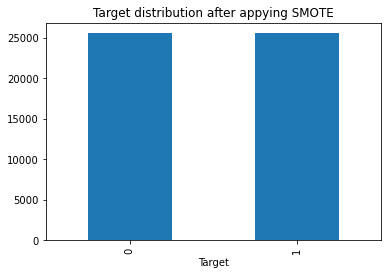

In [23]:
# Viusalizing Target after using Smote

pd.Series(y_resampled).value_counts().plot(kind='bar', title='Target distribution after appying SMOTE', xlabel='Target')

In [24]:
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()    
x_train_scale = st_x.fit_transform(X_resampled)    
x_test_scale = st_x.transform(x_test)

In [25]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs')
model.fit(x_train_scale,y_resampled)
predictions = model.predict(x_test_scale)
lg_train = model.score(x_train_scale, y_resampled)
lg_test = model.score(x_test_scale, y_test)
print("Train Score: ",model.score(x_train_scale, y_resampled))
print("Test Score: ",model.score(x_test_scale, y_test))

Train Score:  0.8764181206478366
Test Score:  0.8680100347980901


In [26]:
# Classification report
from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10986
           1       0.45      0.80      0.57      1371

    accuracy                           0.87     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.87      0.88     12357



In [27]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
ada.fit(x_train_scale, y_resampled)
ad_predictions = ada.predict(x_test_scale)
ada_train = ada.score(x_train_scale, y_resampled)
ada_test = ada.score(x_test_scale, y_test)
print("Train Score: ",ada.score(x_train_scale, y_resampled))
print("Test Score: ",ada.score(x_test_scale, y_test))

Train Score:  0.9045849307565919
Test Score:  0.8829813061422676


In [28]:
# Classification report
from sklearn import metrics

print(metrics.classification_report(y_test, ad_predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     10986
           1       0.48      0.77      0.59      1371

    accuracy                           0.88     12357
   macro avg       0.73      0.83      0.76     12357
weighted avg       0.91      0.88      0.89     12357



In [29]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
nav_model = GaussianNB()

nav_model.fit(x_train_scale, y_resampled.ravel())
nav_predictions = nav_model.predict(x_test_scale)
n_train = nav_model.score(x_train_scale, y_resampled)
n_test = nav_model.score(x_test_scale, y_test)
print("Train Score: ",nav_model.score(x_train_scale, y_resampled))
print("Test Score: ",nav_model.score(x_test_scale, y_test))

Train Score:  0.7872623425397074
Test Score:  0.7793962935987699


In [30]:
# Classification report
from sklearn import metrics

print(metrics.classification_report(y_test, nav_predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86     10986
           1       0.30      0.72      0.42      1371

    accuracy                           0.78     12357
   macro avg       0.63      0.75      0.64     12357
weighted avg       0.88      0.78      0.81     12357



In [31]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

Near = KNeighborsClassifier(n_neighbors = 5 ,metric='euclidean' )
Near.fit(x_train_scale, y_resampled)
Near_predictions = Near.predict(x_test)
knn_train = Near.score(x_train_scale, y_resampled)
knn_test = Near.score(x_test_scale, y_test)
print("Train Score: ",Near.score(x_train_scale, y_resampled))
print("Test Score: ",Near.score(x_test_scale, y_test))

Train Score:  0.939773883107738
Test Score:  0.875455207574654


In [32]:
# Classification report
from sklearn import metrics

print(metrics.classification_report(y_test, Near_predictions))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01     10986
           1       0.11      1.00      0.20      1371

    accuracy                           0.12     12357
   macro avg       0.56      0.50      0.11     12357
weighted avg       0.90      0.12      0.03     12357



In [33]:
# Support Vector Machine

from sklearn import svm

support = svm.SVC()
support.fit(x_train_scale, y_resampled)
support_predictions = support.predict(x_test_scale)
svm_train = support.score(x_train_scale, y_resampled)
svm_test = support.score(x_test_scale, y_test)
print("Train Score: ",support.score(x_train_scale, y_resampled))
print("Test Score: ",support.score(x_test_scale, y_test))

Train Score:  0.9195289883420703
Test Score:  0.8780448328882415


In [34]:
# Classification report
from sklearn import metrics

print(metrics.classification_report(y_test, support_predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     10986
           1       0.47      0.79      0.59      1371

    accuracy                           0.88     12357
   macro avg       0.72      0.84      0.76     12357
weighted avg       0.92      0.88      0.89     12357



In [35]:
model_summary = {"Model": ["Logistic", "Adaboost",
                           "NaiveBayes", "KNN" , "SVM"],
                "TrainScore": [lg_train,ada_train,n_train,knn_train,svm_train],
                "TestScore":[lg_test,ada_test,n_test,knn_test,svm_test]}
pd.DataFrame(model_summary)

,Model,TrainScore,TestScore
0,Logistic,0.876418,0.868010
1,Adaboost,0.904585,0.882981
2,NaiveBayes,0.787262,0.779396
3,KNN,0.939774,0.875455
4,SVM,0.919529,0.878045


# From Above Models we can conclude that SVM has best Score